In [12]:
%matplotlib inline
import xmitgcm
import xarray as xr

In [42]:
datadir='/swot/SUM01/spencer/'
iters=[23260000]
prefixes=['tracer1','tracer2']
ds=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
ds

/home/spencerj/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/spencerj/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm/mds_store.py:268: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:               (XC: 216, XG: 216, YC: 144, YG: 144, Z: 32, Zl: 32, Zp1: 33, Zu: 32, layer_1RHO_bounds: 37, layer_1RHO_center: 36, layer_1RHO_interface: 35, time: 1)
Coordinates:
    iter                  (time) int64 23260000
  * time                  (time) int64 23260000
  * XC                    (XC) >f4 0.4861 1.4583 2.4305 3.4027 4.3749 5.3471 ...
  * YC                    (YC) >f4 -69.5139 -68.5417 -67.5695 -66.5973 ...
  * XG                    (XG) >f4 0.0 0.9722 1.9444 2.9166 3.8888 4.861 ...
  * YG                    (YG) >f4 -70.0 -69.0278 -68.0556 -67.0834 -66.1112 ...
  * Z                     (Z) >f4 -6.7967243 -21.3834 -38.09691 -57.236347 ...
  * Zp1                   (Zp1) >f4 0.0 -13.593449 -29.173353 -47.02047 ...
  * Zu                    (Zu) >f4 -13.593449 -29.173353 -47.02047 ...
  * Zl                    (Zl) >f4 0.0 -13.593449 -29.173353 -47.02047 ...
    rA                    (YC, XC) >f4 dask.array<shape=(144, 216), chunksize=(144,

In [19]:
tr_vmean=ds.TRAC03.mean(dim=('time','Z'))

In [43]:
tr = ds.TRAC10
tr_depth_avg = (tr * ds.drF).mean(dim='Z') / ds.Depth

/home/spencerj/.conda/envs/pangeo/lib/python3.6/site-packages/dask/local.py:253: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


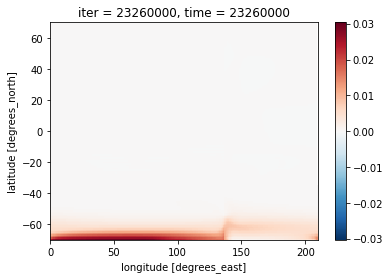

In [44]:
tr_depth_avg.plot()

In [31]:
names = list(ds.data_vars)
all_tracer_list = [ds[name] for name in names]
all_tracers = xr.concat(all_tracer_list, dim='tracer')
all_tracers

<xarray.DataArray 'TRAC01' (tracer: 6, time: 1, Z: 32, YC: 144, XC: 216)>
dask.array<shape=(6, 1, 32, 144, 216), dtype=float32, chunksize=(1, 1, 32, 144, 216)>
Coordinates:
    iter     (time) int64 23220000
  * time     (time) int64 23220000
  * XC       (XC) >f4 0.4861 1.4583 2.4305 3.4027 4.3749 5.3471 6.3193 ...
  * YC       (YC) >f4 -69.5139 -68.5417 -67.5695 -66.5973 -65.6251 -64.6529 ...
  * Z        (Z) >f4 -6.7967243 -21.3834 -38.09691 -57.236347 -79.1394 ...
    rA       (YC, XC) >f4 4088679000.0 4088679000.0 4088679000.0 ...
    Depth    (YC, XC) >f4 4000.0 4000.0 4000.0 4000.0 4000.0 4000.0 4000.0 ...
    drF      (Z) >f4 13.593449 15.579904 17.847116 20.431757 23.374338 ...
    PHrefC   (Z) >f4 66.675865 209.77116 373.73068 561.4886 776.3575 ...
    hFacC    (Z, YC, XC) >f4 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
Dimensions without coordinates: tracer
Attributes:
    units:    kg/kg

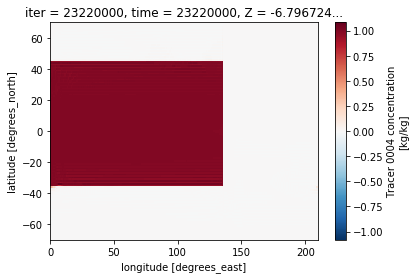

In [25]:
all_tracer_list[3][0,0].plot()

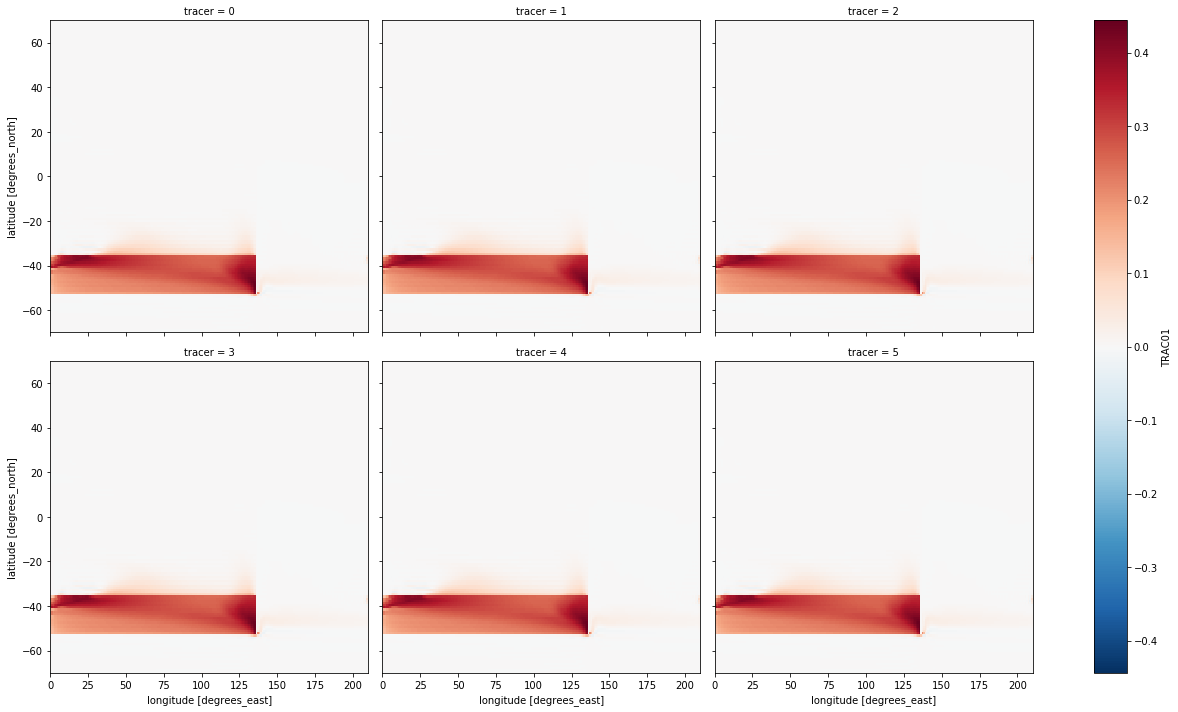

In [18]:
all_tracers.mean(dim=('time', 'Z')).plot(figsize=(18, 10), col='tracer', col_wrap=3)